In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from os.path import join
import warnings

# Upload Long Beach data count

In [3]:
data_folder = 'validation'
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df = pd.read_excel(io=join(data_folder, 'export.xlsx'), header=2, usecols=[0, 1, 3], skipfooter=1,
                       engine="openpyxl")

In [4]:
df

,Time,Belmont Pier Bicycle Counts,Broadway - Eco-Display Classic
0,2016-09-28,644.0,NaN
1,2016-09-29,1218.0,NaN
2,2016-09-30,1206.0,NaN
3,2016-10-01,2336.0,NaN
4,2016-10-02,2534.0,NaN
...,...,...,...
2061,2022-05-21,1962.0,382.0
2062,2022-05-22,2235.0,334.0
2063,2022-05-23,1112.0,305.0
2064,2022-05-24,1127.0,376.0


# Bike Count per Day

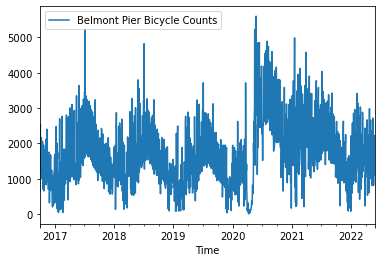

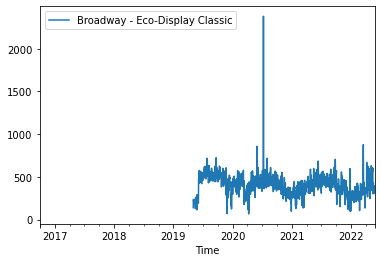

In [9]:
streets = ['Belmont Pier Bicycle Counts', 'Broadway - Eco-Display Classic']
for street in streets:
    df.plot(x='Time', y=street)

# Bike Average Count  per Month

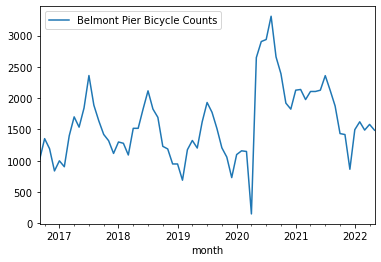

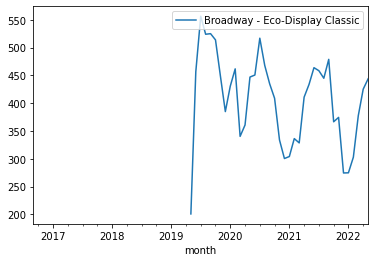

In [14]:
df['month'] = pd.to_datetime(df['Time'], dayfirst=True).dt.to_period('M')
my_df = df.groupby('month').mean()
for street in streets:
    my_df.plot(y=street)

# Bike Average Count  per Month base on the Given Streets

C:\Users\Achituv\AppData\Local\Temp\ipykernel_10760\1193422053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df_not_null['avg'] = my_df_not_null.mean(axis=1)


<AxesSubplot:xlabel='month'>

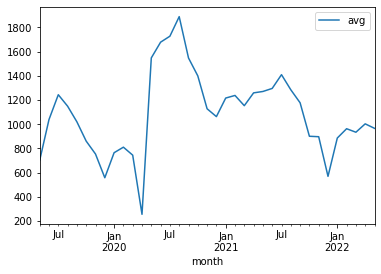

In [15]:
my_df_not_null = my_df[my_df['Broadway - Eco-Display Classic'].notnull()]
my_df_not_null['avg'] = my_df_not_null.mean(axis=1)
my_df_not_null.plot(y='avg')